<h1> Network Property Analysis

The code in this notebook contains functions used to analyse the different properties fractal and non-fractal networks, and to validate theories about the origins of fractality in complex networks. 

In [1]:
# Network analysis modules
from igraph import Graph
import igraph
import networkx as nx

# Mathematics modules
import heapq
import math
import numpy as np
from scipy.io import mmread
import random

# Visualisation modules
import matplotlib.pyplot as plt
import seaborn as sb

# Other modules
import time
import itertools
import pandas as pd

<h2> Tutorial

This area of the notebook can be used to work with the functions given, and some examples are provided.


**Network Properties**

For this section we use the following example Erdős-Rényi network, which we can visualise using `display_network`.

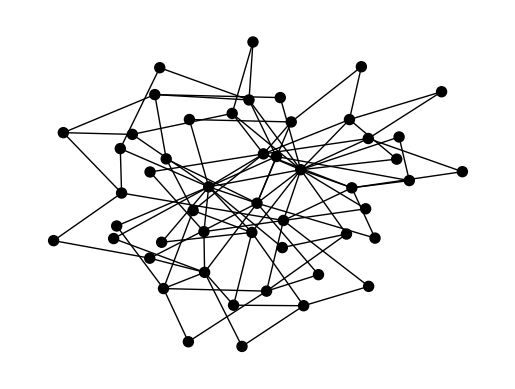

In [81]:
G = igraph.Graph.Barabasi(50,2)
display_network(G)

The functions `find_degree_distribution`, `find_betweenness_centralities`, `find_edge_betweenness_centralities` and `find_clustering_coefficient` can be used to find key attributes of the network.

The first two of these return lists, where the $i$-th element is the degree/betweenness centrality of the $i$-th node.

In [83]:
find_degree_distribution(G)

[15,
 9,
 4,
 6,
 13,
 9,
 6,
 4,
 7,
 5,
 4,
 2,
 2,
 5,
 7,
 4,
 3,
 2,
 5,
 2,
 4,
 3,
 3,
 2,
 3,
 4,
 4,
 3,
 2,
 2,
 2,
 4,
 3,
 5,
 3,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2]

In [85]:
find_betweenness_centralities(G)

[0.3457287279991361,
 0.10171653979051938,
 0.029838502861462054,
 0.056908001295756384,
 0.24321145124716556,
 0.1684277480833603,
 0.07679516250944822,
 0.02919197440881114,
 0.1137977810171688,
 0.05777757531584063,
 0.02788373285822265,
 0.0031543569808875926,
 0.0013747165532879818,
 0.04366226649389914,
 0.07291801641291434,
 0.030921336788683737,
 0.018655855199222554,
 0.0,
 0.03617184969225786,
 0.011088165424900119,
 0.01784836950653277,
 0.022540424900118778,
 0.02225866537091027,
 0.002117414426087895,
 0.011340905409782963,
 0.03928233992009502,
 0.025089758125472407,
 0.02717747813411079,
 0.0039007666558686957,
 0.0,
 0.0012552640103660512,
 0.03296080336896664,
 0.0038548752834467116,
 0.03977837166612678,
 0.004989674441205053,
 0.018152737285390342,
 0.003885244574020084,
 0.0072370019436345965,
 0.0043235746679624225,
 0.006222330201922037,
 0.009210668394341861,
 0.0033254373177842565,
 0.0011216391318432134,
 0.0,
 0.01920891372421985,
 0.0007875769355361192,
 0.00

We can visualise these distributions with the functions `plot_degree_dist` and `plot_betweenness_centrality`

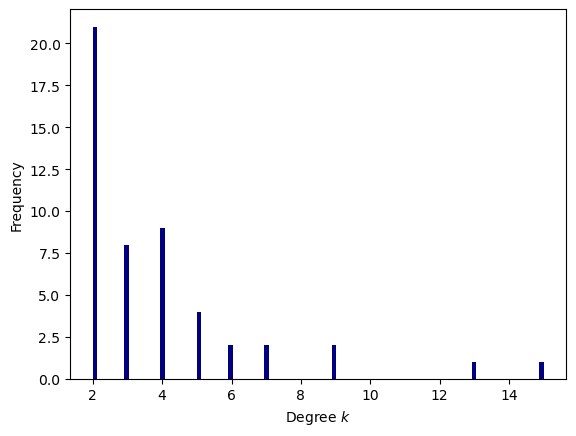

In [91]:
plot_degree_distribution(G)

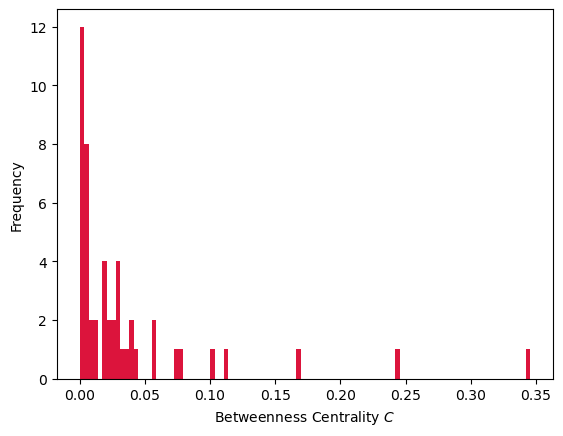

In [89]:
plot_betweenness_centralities(G)

If you need to perform multiple analysis functions on the same graph you can pass precalculated distributions to many functions. This prevents recalculating values which can be costly. 

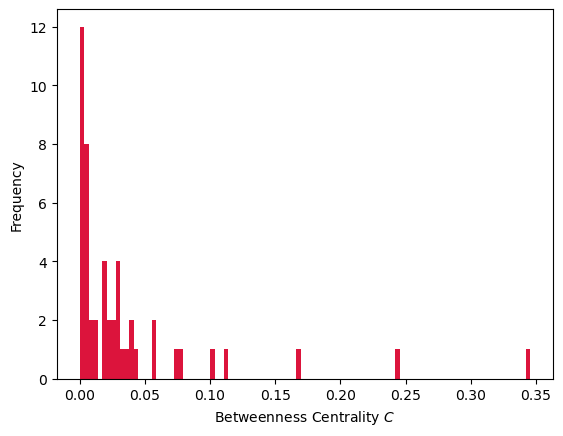

In [93]:
bcs = find_betweenness_centralities(G)
plot_betweenness_centralities(G, bcs=bcs)

`find_edge_betweenness_centralities` returns a list where the $i$-th element is the edge betweenness centrality of the $i$-th edge.

In [95]:
find_edge_betweenness_centralities(G)

[0.02321898283122773,
 0.03829122125040495,
 0.021249757045675416,
 0.023436345966958216,
 0.0323265306122449,
 0.0401464204729511,
 0.061088111435050205,
 0.04244250080984774,
 0.07076611597019761,
 0.05924003887269196,
 0.032738581146744425,
 0.024731130547457084,
 0.0299054097829608,
 0.06030968577907356,
 0.029690962099125362,
 0.01992905733722061,
 0.06242630385487528,
 0.025608357628765795,
 0.02951409135082604,
 0.017624878522837704,
 0.02843148688046648,
 0.02193974732750243,
 0.0206997084548105,
 0.05389277615808228,
 0.021163913184321342,
 0.0502306446388079,
 0.021234855847100755,
 0.019131843213475868,
 0.03441820537738905,
 0.03558471007450598,
 0.018923550372529973,
 0.011695821185617102,
 0.028304178814382904,
 0.02689536767087788,
 0.02700745059928734,
 0.04295756397797214,
 0.01833171363783609,
 0.021310981535471344,
 0.021861354065435712,
 0.04422384191771947,
 0.015809199870424364,
 0.04049076773566569,
 0.017380952380952382,
 0.026885973436993848,
 0.017179462261094

`find_clustering_coefficient` returns the transitivity $T$ of the network.

In [97]:
find_clustering_coefficient(G)

0.09656652360515021

**Finding Hubs**

Hubs are defined as nodes with degree greater than three standard deviations from the mean. We calculate this using the $Z$-score, defined as, 
\begin{equation}
    Z = \frac{k-\mu}{\sigma},
\end{equation}
where $k$ is the degree of the node, $\mu = \overline{k}$ is the mean degree in the network and $\sigma$ is the standard deviation of the degree distribution. 

Thus, hubs are those nodes with $Z$-score greater than 3. To find these hubs, use `identify_hubs`.

In [99]:
identify_hubs(G)

[0, 4]

Hubs can also be identified by the mean degree, where a hub is a node with degree greater than $2\mu$, where $\mu = \overline{k}$ is the mean degree in the network,  

In [107]:
identify_hubs_by_mean(G)

[0, 1, 4, 5]

or by their relative degree, where a hub is a node with betweenness centrality in the 90$^{\text{th}}$ percentile.

In [112]:
identify_hubs_by_percentile(G)

[14, 1, 5, 4, 0]

**Measuring Hub-Hub Repulsion**

`find_hub_hub_edges` returns the number of edges which connect a hub to another hub. If you want to use a specific method for finding hubs, you can either calculate the hubs before and pass the list as an argument, or pass the method you want to use. By default, if no hubs are passed it will use those found by `identify_hubs`.

In [131]:
find_hub_hub_edges(G)

1

In [137]:
hubs = identify_hubs_by_mean(G)
find_hub_hub_edges(G, hubs)

5

In [139]:
find_hub_hub_edges(G, hub_method=identify_hubs_by_percentile)

6

To find which nodes lie on the paths between pairs of hubs, use `find_hub_hub_path_nodes`.

In [146]:
find_hub_hub_path_nodes(G, hub_method=identify_hubs_by_percentile)

{10, 15, 18, 23, 26, 41}

If you want to know how many times each of those nodes appear on such paths, use `find_hub_hub_path_node_occurrences`.find_hub_hub_path_node_occurrences

In [155]:
nodes, occurrences = find_hub_hub_path_node_occurrences(G, hub_method=identify_hubs_by_percentile)
for node in nodes:
    print("Node {0} appears on {1} hub-hub path(s).".format(node, occurrences[node]))

Node 41 appears on 2 hub-hub path(s).
Node 10 appears on 3 hub-hub path(s).
Node 15 appears on 1 hub-hub path(s).
Node 18 appears on 1 hub-hub path(s).
Node 23 appears on 1 hub-hub path(s).
Node 26 appears on 2 hub-hub path(s).


To quantify the effect of hub-hub repulsion in the network we can use the Hub Connectivity Score (HCS) [2], which gives the mean number of hub neighbours belonging to each hub. 

In [161]:
calculate_HCS(G, hub_method=identify_hubs_by_percentile)

2.4

**Degree and Betweenness Centrality Correlation**

The authors of [3] hypothesised that fractal networks have less correlation between the betweenness centrality of nodes and their degrees. We provide several functions to analyse this idea.

`calc_betweenness_degree_correlation` gives the Pearson correlation coefficient of the degree and betweenness centrality distributions for a given network. If the betweenness centrality and degree distribution for the network have already been calculated, these can be passed to the function. 

In [163]:
degrees = find_degree_distribution(G)
calc_betweenness_degree_correlation(G, bcs=bcs, degrees=degrees)

0.9649275211006124

We can also consider the correlation between degree and betweenness centrality for just the hubs/non-hubs in the network. Again, hubs will be found using the `identify_hubs` method unless otherwise specified. 

In [169]:
hubs = identify_hubs_by_mean(G)
calc_betweenness_degree_correlation_non_hubs(G, hubs, bcs=bcs, degrees=degrees)

0.9392162792957589

In [171]:
calc_betweenness_degree_correlation_hubs(G, hubs, bcs=bcs, degrees=degrees)

0.9545645409188331

The function `analyse_betweenness_centrality` analyses the betweenness centrality distribution and returns lots of key attributes of the distribution. If no betweenness centrality distribution is given, it will calculate the betweenness centrality of every node in the network. If you only want to consider a subset of nodes, you can calculate their betweenness centralities and then pass this as an argument to the function. 

In [175]:
max_bc, min_bc, mean_bc, stdv_bc, no_of_high_bc_nodes, mean_max_bc = analyse_betweenness_centrality(G)

In [177]:
print("The maximum betweenness centrality is {0}".format(max_bc))

The maximum betweenness centrality is 0.3457287279991361


In [179]:
print("The minimum betweenness centrality is {0}".format(min_bc))

The minimum betweenness centrality is 0.0


In [181]:
print("The mean betweenness centrality is {0}".format(mean_bc))

The mean betweenness centrality is 0.03613945578231293


In [183]:
print("The standard deviation of the betweenness centrality distribution is {0}".format(stdv_bc))

The standard deviation of the betweenness centrality distribution is 0.06293678863534784


In [185]:
print("The mean betweenness centrality of the top 10% of nodes is {0}".format(mean_max_bc))

The mean betweenness centrality of the top 10% of nodes is 0.19457644962747003


The function `find_hub_betweenness` returns the betweenness centrality distributions of just the hubs and just the non-hubs. 

In [195]:
hub_bcs, non_hub_bcs = find_hub_betweenness(G)
analyse_betweenness_centrality(G, non_hub_bcs)

(0.1684277480833603,
 0.0,
 0.025375679372278012,
 0.033468397109541234,
 1,
 0.10673104956268223)

The function `hub_hub_path_betweenness` finds the betweenness centrality of the nodes on paths between pairs of hubs. 

In [199]:
hub_hub_path_betweenness(G, hub_method=identify_hubs_by_percentile)

[0.0033254373177842565,
 0.02788373285822265,
 0.030921336788683737,
 0.03617184969225786,
 0.002117414426087895,
 0.025089758125472407]

`hub_hub_path_betweenness_by_occurrence` finds the correlation between the betweenness centrality of nodes and the number of times they appear on paths between hubs. 

In [205]:
 _, r = hub_hub_path_betweenness_by_occurrence(G, hub_method=identify_hubs_by_percentile)
r

0.008567193593858243

**Network Distances**

We can analyse the distances of networks, namely their diameter and their average shortest path length. 

In [213]:
diam, aspl = find_distances(G)
print("Diameter = {0}".format(diam))
print("Average Shortest Path Length = {0}".format(aspl))

Diameter = 5
Average Shortest Path Length = 2.7346938775510203


`mean_hub_distance` gives the mean distance between pairs of hubs. 

In [220]:
mean_distance, distances = mean_hub_distance(G, hub_method=identify_hubs_by_percentile)
print("Mean hub distance = {0}".format(mean_distance))

Mean hub distance = 1.5


It also returns a list of distances between pairs of hubs. 

In [223]:
distances

[3, 1, 2, 2, 2, 1, 1, 1, 1, 1]

The function can also find the mean hub distance normalised over the mean distance (average shortest path length) of the network. 

In [257]:
mean_hub_distance(G, hub_method=identify_hubs_by_percentile, normalised=True)

(0.5485074626865671, [3, 1, 2, 2, 2, 1, 1, 1, 1, 1])

The probability that two hubs are separated by a distance $x$ is given by `hub_distance_distribution`.

In [259]:
hub_distance_distribution(G, hub_method=identify_hubs_by_percentile)

{3: 0.1, 1: 0.6, 2: 0.3}

**Edge Betweenness Centrality**

`edge_vertex_betweenness_correlation` finds the Pearson correlation coefficient for the betweenness centrality of edges and the betweenness centrality of the endpoints of the edges. 

In [265]:
edge_vertex_betweenness_correlation(G)

0.5580913935711372

Again, if the betweenness centrality and the edge betweenness centrality distribution of the network has already been calculated, this can be passed to the function as a parameter. 

In [270]:
ebcs = find_edge_betweenness_centralities(G)
edge_vertex_betweenness_correlation(G, bcs, ebcs)

0.5580913935711372

We can also examine the correlation between the betweenness centrality of edges and the degrees of the endpoints of the edges. 

In [274]:
edge_betweenness_degree_correlation(G, degrees, ebcs)

0.5211716133450748

**Network Skeleton**

`find_skel` finds the skeleton of a network using Kruskal's Greedy Algorithm, which works as follows. 

1. Remove all edges from the network. 

2. Sort the old edges in order of decreasing betweenness centrality. 

3. Take the edge with the next highest betweenness centrality. If adding the edge to the network would create a cycle, discard it. Otherwise add it to the skeleton. 

C:\Users\hamil\AppData\Local\Temp\ipykernel_16824\3879064793.py:30: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  paths = H.get_shortest_paths(edge[0], to=edge[1], output="vpath")


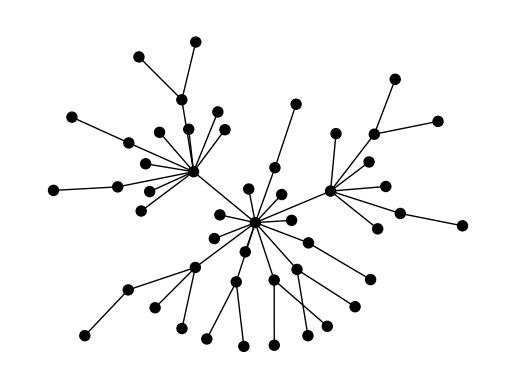

In [282]:
H = find_skel(G)
display_network(H)

For further analysis, we can find a list of the edge IDs from the original network. 

In [286]:
find_skeleton_eids(G)

C:\Users\hamil\AppData\Local\Temp\ipykernel_16824\3879064793.py:30: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  paths = H.get_shortest_paths(edge[0], to=edge[1], output="vpath")


[8,
 16,
 6,
 13,
 9,
 23,
 51,
 25,
 47,
 59,
 85,
 39,
 77,
 35,
 63,
 70,
 41,
 5,
 67,
 71,
 1,
 75,
 54,
 91,
 29,
 94,
 28,
 49,
 79,
 4,
 96,
 12,
 18,
 56,
 20,
 32,
 34,
 43,
 82,
 89,
 65,
 74,
 58,
 46,
 21,
 38,
 61,
 87,
 84]

We can also find the betweenness centralities of the edges in the skeleton and not in the skeleton, for comparison. 

In [293]:
skeleton_ebcs, non_skeleton_ebcs = find_skeleton_edge_betweenness(G)

C:\Users\hamil\AppData\Local\Temp\ipykernel_16824\3879064793.py:30: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  paths = H.get_shortest_paths(edge[0], to=edge[1], output="vpath")


In [298]:
_, _, skel_mean_bc, _, _, _ = analyse_betweenness_centrality(G, bcs=skeleton_ebcs)
_, _, non_skel_mean_bc, _, _, _ = analyse_betweenness_centrality(G, bcs=non_skeleton_ebcs)
print("The mean edge betweenness centrality of edges in the skeleton is {0}.".format(skel_mean_bc))
print("The mean edge betweenness centrality of edges in the non-skeleton is {0}.".format(non_skel_mean_bc))

The mean edge betweenness centrality of edges in the skeleton is 0.03724187673125615.
The mean edge betweenness centrality of edges in the non-skeleton is 0.018955039952488935.


<h2> Workspace

This area of the workbook can be used to experiment with functions or write new code.

<h1> Functions

<h2> 1 Hub-Hub Repulsion

Functions in this section provide tools to analyse the effect of hub-hub repulsion/attraction in the network.

<h3> 1.1 Find Hubs

Hubs are defined as nodes with degree greater than three standard deviations from the mean. We calculate this using the $Z$-score, defined as, 
\begin{equation}
    Z = \frac{k-\mu}{\sigma},
\end{equation}
where $k$ is the degree of the node, $\mu = \overline{k}$ is the mean degree in the network and $\sigma$ is the standard deviation of the degree distribution. 

Thus, hubs are those nodes with $Z$-score greater than 3. 

In [15]:
def identify_hubs(G, degrees=None):
    """
    Identify the hubs of the network using the Z-score, where hubs are those nodes with Z > 3.
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
        
    Returns:
        (list): A list of nodes with Z > 3.
    """
    # Find the degree distribution of the network. 
    if not degrees:
        degrees = find_degree_distribution(G)
    
    # Find the mean and standard deviation of the degree distribution.
    mean_degree = np.mean(degrees)
    stdv_degree = np.std(degrees)
    
    # Initialise an empty dictionary to store the Z-score for each node.
    z_scores = dict.fromkeys(range(G.vcount()))

    # For each node calculate and store the Z-score
    for i in z_scores:
        z_scores[i] = (degrees[i] - mean_degree)/stdv_degree
    
    # Find the nodes which have a Z-score greater than 3
    dd_dict_filtered = {i: degrees[i] for i in range(G.vcount()) if z_scores[i] > 3}
    
    # Return a list of these nodes.
    return list(dd_dict_filtered.keys())

**Other Methods**

There are other methods we can use to identify hubs in the network. 

`identify_hubs_by_mean` identifies hubs as those nodes with degree greater than $2\mu$, where $\mu = \overline{k}$ is the mean degree in the network.  

In [105]:
def identify_hubs_by_mean(G, degrees=None, factor=2):
    """
    Identify the hubs of the network using the mean, where hubs are those nodes with degree greater than some factor (usually 2) times the mean.
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
        factor (int) (opt): The factor by which the mean is multiplied to identify hubs. Default is 2. 
        
    Returns:
        (list): A list of hubs.
    """
    # Find the degree distribution of the network. 
    if not degrees:
        degrees = find_degree_distribution(G)

    # Find the mean degree
    mean_degree = np.mean(degrees)
    
    dd_dict_filtered = {i: degrees[i] for i in range(G.vcount()) if degrees[i] > factor*mean_degree}
    
    return list(dd_dict_filtered.keys())

`identify_hubs_by_percentile` identifies hubs as those nodes in the 90% percentile.

In [19]:
def identify_hubs_by_percentile(G, degrees=None, percentile=90):
    """
    Identify the hubs of the network by percentile, where hubs are those in some percentile of the degree distribution (normally 90%)
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
        percentile (int) (opt): The percentile hubs belong to. Default is 90.
        
    Returns:
        (list): A list of hubs.
    """
    # Find the degree distribution of the network. 
    if not degrees:
        degrees = find_degree_distribution(G)
        
    # Create a dictionary of node indexes and degrees.
    dd_dict = {i: degrees[i] for i in range(G.vcount())}

    # Find a list of nodes sorted by degree
    sorted_nodes = [node for node, k in sorted(dd_dict.items(), key=lambda x: x[1])]
    
    # Find the cutoff index
    cutoff = round(percentile*(G.vcount()/100))
    
    # Return nodes in the specified percentile
    return sorted_nodes[cutoff:]

**Properties of Hubs**

`mean_hub_degree` finds the mean degree of the hubs in the network.

In [27]:
def mean_hub_degree(G, hubs=None, hub_method=identify_hubs, degrees=None):
    """
    Calculates the mean hub degree in the network.
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        hubs (list) (opt): A list of hubs in the network, If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function finds the hubs.
        hub_method (func) (opt): If the hubs are to be calculated, then this parameter specifies the method used to find hubs. Default is identify_hubs, which uses the Z score.
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
    """
    
    # Find the degree distribution of the network. 
    if not degrees:
        degrees = find_degree_distribution(G)
        
    # Find the hubs of the network
    if not hubs:
        hubs = hub_method(G, degrees=None)
    
    # Create a list of degrees of hubs
    hub_degrees = [degrees[i] for i in hubs]
   
    # Return the mean of the hub degrees. 
    return np.mean(hub_degrees)

<h3> 1.2 Find Paths between Hubs

**Adjacent Hubs**

`find_hub_hub_edges` returns the number of edges connecting hubs to other hubs in a network.

In [29]:
def find_hub_hub_edges(G, hubs=None, hub_method=identify_hubs, degrees=None):
    """
    Finds the number of edges which connect hubs to other hubs.
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        hubs (list) (opt): A list of hubs in the network, If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function finds the hubs.
        hub_method (func) (opt): If the hubs are to be calculated, then this parameter specifies the method used to find hubs. Default is identify_hubs, which uses the Z score.
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
    
    Returns:
        no_of_hub_edges (int): The number of edges between hubs.
    """
    
    # Find the degree distribution of the network. 
    if not degrees:
        degrees = find_degree_distribution(G)
        
    # Find the hubs of the network
    if not hubs:
        hubs = hub_method(G, degrees=None)
    
    # Initialise a variable to count the number of hub-hub edges
    no_of_hub_edges = 0
    
    # Iterate through every pair of hubs
    for hub_u, hub_v in itertools.combinations(hubs, 2):
        # If there is an edge between this pair of hubs, then add one to the total number of hub-hub edges
        if G.are_adjacent(hub_u, hub_v):
            no_of_hub_edges += 1
    
    # Return the total number of edges between hubs
    return no_of_hub_edges

**Paths between Hubs**

The following code provides functions to find the nodes on the shortest paths between hubs. 

`find_hub_hub_path_nodes` finds a list of these nodes, and `find_hub_hub_path_node_occurrences` also finds a dictionary with the number of times each node appears on a shortest path.

In [31]:
def find_hub_hub_path_nodes(G, hubs=None, hub_method=identify_hubs, degrees=None):
    """
    Finds the nodes on the shortest paths between pairs of hubs. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        hubs (list) (opt): A list of hubs in the network, If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function finds the hubs.
        hub_method (func) (opt): If the hubs are to be calculated, then this parameter specifies the method used to find hubs. Default is identify_hubs, which uses the Z score.
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
    
    Returns:
        hub_hub_path_nodes (list): A list of nodes on the paths between hubs. 
    """
    
    # Find the degree distribution of the network. 
    if not degrees:
        degrees = find_degree_distribution(G)
        
    # Find the hubs of the network
    if not hubs:
        hubs = hub_method(G, degrees=None)
        
    # Initialise an empty set to store the nodes. 
    hub_hub_path_nodes = set()
    
    # Iterate through each possible pair of hubs
    for hub_u, hub_v in itertools.combinations(hubs, 2):
        # Find all the shortest paths between this pair of hubs. 
        for path in G.get_all_shortest_paths(hub_u, to=hub_v):
            # Add all nodes on this path to the set of nodes.
            hub_hub_path_nodes.update(path)
    
    # Remove the hubs from the list
    hub_hub_path_nodes = hub_hub_path_nodes.difference(set(hubs))
    
    # Return the list of nodes. 
    return hub_hub_path_nodes

In [33]:
def find_hub_hub_path_node_occurrences(G, hubs=None, hub_method=identify_hubs, degrees=None):
    """
    Finds the nodes on the shortest paths between pairs of hubs, and the number of times they appear. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        hubs (list) (opt): A list of hubs in the network, If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function finds the hubs.
        hub_method (func) (opt): If the hubs are to be calculated, then this parameter specifies the method used to find hubs. Default is identify_hubs, which uses the Z score.
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
    
    Returns:
        hub_hub_path_nodes (list): A list of nodes on the paths between hubs. 
        occurrences (dict): A dictionary with nodes as keys and the number of times they appear on shortest paths as values. 
    """
    
    # Find the degree distribution of the network. 
    if not degrees:
        degrees = find_degree_distribution(G)
        
    # Find the hubs of the network
    if not hubs:
        hubs = hub_method(G, degrees=None)
        
    # Initialise a set to store the nodes. 
    hub_hub_path_nodes = set()
    
    # Initialise a dictionary to store the number of occurrences
    occurrences = dict.fromkeys(range(G.vcount()), 0)
    
    # Iterate through each pair of hubs
    for hub_u, hub_v in itertools.combinations(hubs, 2):
        # Iterate through every shortest path between that pair of hubs.
        for path in G.get_all_shortest_paths(hub_u, to=hub_v):
            # Add all nodes on this path to the set of nodes.
            hub_hub_path_nodes.update(path)
            # For each non-hub on the path, add the number of occurrences to the dictionary
            for node in path:
                if node not in hubs:
                    occurrences[node] += path.count(node)
    
    # Remove the hubs from the list
    hub_hub_path_nodes = hub_hub_path_nodes.difference(set(hubs))
    
    # Remove all nodes from the dictionary with no occurrences
    occurrences = {node:occurrences[node] for node in occurrences if occurrences[node] > 0} 

    return hub_hub_path_nodes, occurrences

<h3> 1.3 Quantifying Hub-Hub Repulsion

There are multiple ways we can quantify the hub-hub repulsion.

**Hub Connectivity Score (HCS)**

The Hub Connectivity Score (HCS) [2] is defined as,
\begin{equation}
    \text{HCS} := 2\frac{E_{\text{hub}}}{N_{\text{hub}}},
\end{equation}
where $E_{\text{hub}}$ is the number of edges between hubs, and $N_{\text{hub}}$ is the number of hubs. 

In [35]:
def calculate_HCS(G, hubs=None, hub_method=identify_hubs, degrees=None, normalised=False):
    """
    Calculate the Hub Connectivity Score (HCS) of the network. This is the average number of hubs each hub is adjacent to.
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        hubs (list) (opt): A list of hubs in the network, If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function finds the hubs.
        hub_method (func) (opt): If the hubs are to be calculated, then this parameter specifies the method used to find hubs. Default is identify_hubs, which uses the Z score.
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
        normalised (bool) (opt): If True, the Hub Connectivity Score is normalised by the number of hubs in the network. 
        
    Returns:
        (float): The Hub Connectivity Score of the network.
    """
    
    # Find the degree distribution of the network. 
    if not degrees:
        degrees = find_degree_distribution(G)
        
    # Find the hubs of the network
    if not hubs:
        hubs = hub_method(G, degrees=None)
        
    # If there are no hubs in the network, the HCS has no value. 
    if len(hubs) == 0:
        return np.NaN
    
    # Find the number of hub-hub edges
    E_hub = find_hub_hub_edges(G, hubs=hubs, degrees=degrees)
    
    # Find the number of hubs
    N_hub = len(hubs)
    
    # Calculate the HCS 
    HCS = 2*E_hub/N_hub
    
    if normalised:
        HCS = HCS/N_hub
              
    # Return the HCS
    return HCS

<H2> 2 Degree and Betweenness Centrality Correlation

Functions in this section provide tools to analyse the correlation between the degrees and betweenness centrality

<h3>2.1 Calculating Distributions

Many functions in this section rely on the degree and betweenness centrality distribution of the network, which (especially the latter) can be expensive to compute. Therefore, each function has an optional parameter for the degree distribution `degrees` and the normalised betweenness centralities `bcs` so that these values can be calculated once and then passed to every other function for analysis. They are found using the `find_degree_distribution` and `find_betweenness_centralities` functions, respectively. 

**Degree Distribution**

In [3]:
def find_degree_distribution(G):
    """
    Calculates the degree distribution of the network. 
    
    Returns:
        (list): A list of degrees in the network. The i-th value is the degree of the i-th node. 
        
    """
    return G.degree()

**Betweenness Centralities**

In [5]:
def find_betweenness_centralities(G):
    """
    Calculates the normalised betweenness centrality distribution of the network. 
    
    Returns:
        (list): A list of betweenness centralities in the network. The i-th value is the betweenness centrality of the i-th node. 
        
    """
    # Calculate the normalising constant for the betweenness centrality.
    N = G.vcount()
    normalising_constant = 2/((N-2)*(N-1))
    
    # Calculate the betweenness centralities. 
    bc = G.betweenness()
    
    # Normalise the betweenness centralities 
    bc = [v*normalising_constant for v in bc]

    return bc

<h3> 2.2 Visualising Distributions

**Plotting the Degree Distribution**

In [7]:
def plot_degree_distribution(G, degrees=None, save_path=None, plot=True):
    """
    Plots the degree distribution of a given network on a histogram. 
    
    Args:
        G (igraph.Graph): The network to be analysed.
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
        save_path (str) (opt): If a save path is given then the histogram is saved as a .png file. Default is None.
        plot (Bool) (opt): If True, the histogram is displayed. Default is True. 
        
    Returns:
        None
    """
    
    # Find the degree distribution of the network. 
    if not degrees:
        degrees = find_degree_distribution(G)
    
    # Plot a degree distribution histogram
    plt.hist(degrees, bins=100, color="navy")
    
    # Label the axis
    plt.xlabel("Degree $k$")
    plt.ylabel("Frequency")
    
    # If a save path is given, then save the file in that location.
    if save_path:
        plt.savefig(save_path)
        
    # If plot is True display the graph
    if plot:
        plt.show()
    
    # Close the figure
    plt.close()

**Plotting the Betweenness Centrality Distribution**

In [9]:
def plot_betweenness_centralities(G, bcs=None, save_path=None, plot=True):
    """
    Plots the betweenness centrality distribution of a given network on a histogram. 
    
    Args:
        G (igraph.Graph): The network to be analysed.
        bcs (list) (opt): A list of betweenness centralities in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        save_path (str) (opt): If a save path is given then the histogram is saved as a .png file. Default is None.
        plot (Bool) (opt): If True, the histogram is displayed. Default is True. 
        
    Returns:
        None
    """
    # Find the betweenness centrality distribution of the network. 
    if not bcs:
        bcs = find_betweenness_centralities(G)
    
    # Plot a degree distribution histogram
    plt.hist(bcs, bins=100, color="crimson")
    
    # Label the axis
    plt.xlabel("Betweenness Centrality $C$")
    plt.ylabel("Frequency")
    
    # If a save path is given, then save the file in that location.
    if save_path:
        plt.savefig(save_path)
        
    # If plot is True display the graph
    if plot:
        plt.show()
    
    # Close the figure
    plt.close()

<h3> 2.3 Degree and Betweenness Correlation Coefficient

`calc_betweenness_degree_correlation` finds the Pearson correlation coefficient for the betweenness centrality and degree distribution of the network. 

In [11]:
def calc_betweenness_degree_correlation(G, bcs=None, degrees=None):
    """
    Calculates the Pearson correlation coefficient for the degree and betweenness centrality of the nodes in a network. 
    Fractal networks are hypothesised to be less correlated in this regard than non-fractal networks. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        bcs (list) (opt): A list of betweenness centralities in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
        
        
    Returns:
        (float): Pearson's correlation coefficient. 
    """
    
    # Find the betweenness centrality distribution of the network. 
    if not bcs:
        bcs = find_betweenness_centralities(G)
    
    # Find the degree distribution of the network. 
    if not degrees:
        degrees = find_degree_distribution(G)
    
    # Convert both to a Pandas Series 
    bc_series = pd.Series(bcs)
    dd_series = pd.Series(degrees)
    
    # Return the correlation coefficient for the variables. 
    return bc_series.corr(dd_series)

We can also find the Pearson correlation coefficient for just the hubs or just the non-hubs in the network. 

In [21]:
def calc_betweenness_degree_correlation_non_hubs(G, hubs=None, hub_method=identify_hubs, bcs=None, degrees=None):
    """
    Calculates the Pearson correlation coefficient for the degree and betweenness centrality of the non-hub nodes in a network. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        hubs (list) (opt): A list of nodes indexes for hubs in the network. If no list is passed, the function with find the hubs with hub_method.
        hub_method (func): The method by which to calculate hubs, if not give. Default is identify_hubs. 
        bcs (list) (opt): A list of betweenness centralities in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
        
    Returns:
        (float): Pearson's correlation coefficient. 
    """
    # Find the hubs of the network
    if not hubs:
        hubs = hub_method(G)
        
    # Find the betweenness centrality distribution of the network. 
    if not bcs:
        bcs = find_betweenness_centralities(G)
    
    # Find the degree distribution of the network. 
    if not degrees:
        degrees = find_degree_distribution(G)
        
    # Only consider the betweenness centrality for non hubs
    filtered_bc = [bcs[i] for i in range(G.vcount()) if i not in hubs]
    # Only consider the degree for non hubs
    filtered_dd = [degrees[i] for i in range(G.vcount()) if i not in hubs]
    
    # Convert both to a Pandas Series 
    bc_series = pd.Series(filtered_bc)
    dd_series = pd.Series(filtered_dd)
    
    # Return the correlation coefficient for the variables. 
    return bc_series.corr(dd_series)

In [23]:
def calc_betweenness_degree_correlation_hubs(G, hubs=None, hub_method=identify_hubs, bcs=None, degrees=None):
    """
    Calculates the Pearson correlation coefficient for the degree and betweenness centrality of the hub nodes in a network. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        hubs (list) (opt): A list of nodes indexes for hubs in the network. If no list is passed, the function with find the hubs with hub_method.
        hub_method (func): The method by which to calculate hubs, if not give. Default is identify_hubs. 
        bcs (list) (opt): A list of betweenness centralities in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
        
    Returns:
        (float): Pearson's correlation coefficient. 
    """
    # Find the hubs of the network
    if not hubs:
        hubs = hub_method(G)
    
    # Find the betweenness centrality distribution of the network. 
    if not bcs:
        bcs = find_betweenness_centralities(G)
    
    # Find the degree distribution of the network. 
    if not degrees:
        degrees = find_degree_distribution(G)

    # Only consider the betweenness centrality for non hubs
    filtered_bc = [bcs[i] for i in range(G.vcount()) if i in hubs]
    # Only consider the degree for non hubs
    filtered_dd = [degrees[i] for i in range(G.vcount()) if i in hubs]
    
    # Convert both to a Pandas Series 
    bc_series = pd.Series(filtered_bc)
    dd_series = pd.Series(filtered_dd)
    
    # Return the correlation coefficient for the variables. 
    return bc_series.corr(dd_series)

<h3> 2.4 Analysing the Betweenness Centrality Distribution

The function `analyse_betweenness_centrality` finds the maximum, minimum, mean and standard deviation of the betweenness centrality distribution, as well as the number of outliers with high betweenness centrality. 

In [25]:
def analyse_betweenness_centrality(G, bcs=None):
    """
    Returns key attributes of the betweenness centrality distribution of a network.
    Namely, finds the maximum, minimum and mean betweenness centrality, as well as the standard deviation and number of outliers with greater than expected betweenness.
    
    Args:
        G (igraph.Graph): Network to be analysed. 
        bcs (list) (opt): A list of betweenness centralities in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        
    Returns:
        max_bc (float): The maximum betweenness centrality in the network.
        min_bc (float): The minimum betweenness centrality in the network.
        mean_bc (float): The mean betweenness centrality in the network.
        stdv_bc (float): The standard deviation of the betweenness centrality distribution in the network.
        no_of_high_bc_nodes (int): Number of nodes with significantly higher betweenness centrality than expected. 
        mean_max_bc (float): The mean betweenness centrality of the top 10% of nodes in the network. 
    """
    # Find the betweenness centrality distribution of the network. 
    if not bcs:
        bcs = find_betweenness_centralities(G)
    
    # Find the maximum betweenness centrality
    max_bc = max(bcs)
    # Find the minimum betweenness centrality
    min_bc = min(bcs)
    # Find the mean betweenness centrality
    mean_bc = np.mean(bcs)
    # Find the standard deviation of the betweenness centrality
    stdv_bc = np.std(bcs)
    
    # Outliers are those with betweenness centrality 3 standard deviations higher than the mean.
    # Calculate the cutoff value
    cutoff = mean_bc + 3*stdv_bc
    # Find nodes with betweenness centralities greater than this cutoff. 
    high_bcs = [v for v in bcs if v > cutoff]
    # The number of nodes with high betweenness centrality is the length of this list.
    no_of_high_bc_nodes = len(high_bcs)
    
    # Find the top 10% of betweenness centralities. 
    cutoff = round(len(bcs)*0.9)
    bcs.sort()
    top_10_percent = bcs[cutoff:]
    # Find the mean of these values.
    mean_max_bc = np.mean(top_10_percent)
    
    # Return the maximum, minimum, mean, standard deviation, number of outliers and mean of the top 10% of betweenness centralities. 
    return max_bc, min_bc, mean_bc, stdv_bc, no_of_high_bc_nodes, mean_max_bc

<h2> 3 Network Distances

The functions in this section are used to analyse the distances in fractal and non-fractal networks. 

<h3>3.1 General Network Distances

In [37]:
def find_distances(G):
    """
    Finds the diameter and average shortest path length of a network. 
    
    Args: 
        G (igraph.Graph): The network to be analysed. 
        
    Returns:
        diam (int): The diameter of the network.
        aspl (float): The average shortest path length of the network. 
    """
    # Calculate the diameter
    diam = G.diameter()
    # Calculate the average shortest path length
    aspl = G.average_path_length()
    
    # Return both values
    return diam, aspl

<h3>3.2 Distances between Hubs

In [252]:
def mean_hub_distance(G, hubs=None, hub_method=identify_hubs, normalised=False, degrees=None):
    """
    Finds the mean distance between hubs. 
    The normalised mean distance is the mean distance between hubs over the mean distance between any pair of nodes in the network. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        hubs (list) (opt): A list of hubs in the network, If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function finds the hubs.
        hub_method (func) (opt): If the hubs are to be calculated, then this parameter specifies the method used to find hubs. Default is identify_hubs, which uses the Z score.
        normalised (Bool) (opt): If true, the distances are normalised over the average distance in the network. Default is False.
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        
    Returns:
        mean_distance (float): The mean distance between pairs of hubs in the network. 
        hub_distances (list): A list of distances between pairs of hubs. 
    """
    # Find the hubs of the network
    if not hubs:
        hubs = hub_method(G, degrees=degrees)
        
    # If there are no hubs in the network, then there is no mean distance.
    if len(hubs) == 0:
        return np.Nan(), []
    
    # Initialise an empty list for hub distances
    hub_distances = []
    
    # Add the distance between each pair of hubs to the list
    for hub_u, hub_v in itertools.combinations(hubs, 2):
        hub_distances.append(len(G.get_shortest_paths(hub_u, to=hub_v, output="vpath")[0]) -1)
    
    # Find the mean
    mean_distance = np.mean(hub_distances)
    
    # Normalise the mean with the average distance between any pair of nodes.
    if normalised:
         mean_distance =  mean_distance / G.average_path_length()
        
    return  mean_distance, hub_distances

In [261]:
def hub_distance_distribution(G, hubs=None, hub_method=identify_hubs, degrees=None):
    """
    Find the distribution of distances between hubs.
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        hubs (list) (opt): A list of hubs in the network, If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function finds the hubs.
        hub_method (func) (opt): If the hubs are to be calculated, then this parameter specifies the method used to find hubs. Default is identify_hubs, which uses the Z score.
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        
    Returns:
        distance_distributions (dict): A dictionary with distances as keys, the probability of two hubs being separated by that distance as the values. 
    """
    # Find the hubs of the network
    if not hubs:
        hubs = hub_method(G, degrees=degrees)
    
     # If there are no hubs in the network, then there is no mean distance.
    if len(hubs) == 0:
        return np.Nan(), []
    
    # Find the number of possible edges.
    no_of_possible_edges = (len(hubs)*(len(hubs)-1))/2
    
    # Find a list of distances between pairs of hubs in the network
    _, hub_distances = mean_hub_distance(G, hubs=hubs)
    
    # Initialise an empty dictionary to store the probabilities.
    distance_distribution = dict.fromkeys(hub_distances)
    
    # For each distance, find the probability of it being the distance between two hubs. 
    for distance in hub_distances:
        distance_distribution[distance] = hub_distances.count(distance) / no_of_possible_edges
        
    # Return the dictionary
    return distance_distribution


<h2> 4 Edge Betweenness Centrality

The following function finds the edge betweenness centralities of edges in a given network.

In [43]:
def find_edge_betweenness_centralities(G):
    """
    Calculates the normalised betweenness centrality distribution of the network. 
    
    Returns:
        (list): A list of betweenness centralities in the network. The i-th value is the betweenness centrality of the i-th node. 
        
    """
    # Calculate the normalising constant for the betweenness centrality.
    N = G.vcount()
    normalising_constant = 2/(N*(N-1))
    
    # Calculate the betweenness centralities. 
    ebc = G.edge_betweenness()
    
    # Normalise the betweenness centralities 
    ebc = [v*normalising_constant for v in ebc]

    return ebc

**Correlation between Edge Betweenness and Node Properties**

In [46]:
def edge_vertex_betweenness_correlation(G, bcs=None, ebcs=None):
    """
    Calculates the correlation between the betweenness centrality of edges and the betweenness centrality of its endpoints.
    
    Args:
        G (igraph.Graph): The network to be analysed.
        bcs (list) (opt): A list of betweenness centralities in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        ebcs (list) (opt): A list of betweenness centralities in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        
    """
    
    # Find the betweenness centralities
    if not bcs:
        bcs = find_betweenness_centralities(G)
        
    # Find the edge betweenness centralities
    if not ebcs:
        ebcs = find_edge_betweenness_centralities(G)
        
    # Initialise an empty list to store the edge betweenness centralities of each edge 
    edge_bcs = []  
    # Initialise an empty list to store the node betweenness centralities of every edge endpoint.
    node_bcs = []
    
    # Iterate through every edge in the network
    for edge_index in range(G.ecount()):
        # Find the endpoints of the edge
        edge = G.es()[edge_index]
        source = edge.tuple[0]
        target = edge.tuple[1]
        
        # Find the betweenness centrality of the edge and its endpoints. 
        edge_bc = ebcs[edge_index]
        source_bc = bcs[source]
        target_bc = bcs[target]
        
        # Add the betweenness centrality of the edge and its source to the lists. 
        edge_bcs.append(edge_bc)
        node_bcs.append(source_bc)
        
        # Add the betweenness centrality of the edge and its target to the lists. 
        edge_bcs.append(edge_bc)
        node_bcs.append(target_bc)
    
    # Convert the lists to pandas Series
    edge_bcs_series = pd.Series(edge_bcs)
    node_bcs_series = pd.Series(node_bcs)
        
    # Return the correlation coefficient for the variables.
    return edge_bcs_series.corr(node_bcs_series)

In [48]:
def edge_betweenness_degree_correlation(G, degrees=None, ebcs=None):
    """
    Calculates the correlation between the betweenness centrality of edges and the degree of its endpoints.
    
    Args:
        G (igraph.Graph): The network to be analysed.
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        ebcs (list) (opt): A list of betweenness centralities in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        
    """
    
    # Find the degrees of nodes
    if not degrees:
        degrees = find_degree_distribution(G)
        
    # Find the edge betweenness centralities
    if not ebcs:
        ebcs = find_edge_betweenness_centralities(G)
        
    # Initialise an empty list to store the edge betweenness centralities of each edge 
    edge_bcs = []  
    # Initialise an empty list to store the degree of every edge endpoint.
    node_degrees = []
    
    # Iterate through every edge in the network
    for edge_index in range(G.ecount()):
        # Find the endpoints of the edge
        edge = G.es()[edge_index]
        source = edge.tuple[0]
        target = edge.tuple[1]
        
        # Find the betweenness centrality of the edge and the degrees of its endpoints. 
        edge_bc = ebcs[edge_index]
        source_k = degrees[source]
        target_k = degrees[target]
        
        # Add the betweenness centrality of the edge and its source's degree to the lists. 
        edge_bcs.append(edge_bc)
        node_degrees.append(source_k)
        
        # Add the betweenness centrality of the edge and its target's degree to the lists. 
        edge_bcs.append(edge_bc)
        node_degrees.append(target_k)
    
    # Convert the lists to pandas Series
    edge_bcs_series = pd.Series(edge_bcs)
    node_degrees_series = pd.Series(node_degrees)
        
    # Return the correlation coefficient for the variables.
    return edge_bcs_series.corr(node_degrees_series)

<h2> 5 Network Skeleton

<h3> 5.1 Finding $\text{skel}(G)$

`find_skel` finds the skeleton of a given network, and `find_skeleton_eids` finds the edges of the network which are included in the skeleton. 

In [50]:
def find_skel(G, ebcs=None):
    """
    Finds the skeleton of the given network.
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        ebcs (list) (opt): A list of edge betweenness centralities. If already calculated, it can be passed as an argument to prevent duplication. Default is None, meaning it will be calculated internally.
        
    Returns:
        H (igraph.Graph): The skeleton of the network G
    """
    
    # Find the edge betweenness centralities
    if not ebcs:
        ebcs = find_edge_betweenness_centralities(G)

    # Create a list of tuples of the form (edge ID, edge betweenness centrality)
    edges_to_ebcs = [(G.es()[i].tuple, ebcs[i]) for i in range(G.ecount())]
    
    # Sort the list in order of decreasing betweenness
    edges_to_ebcs.sort(key = lambda x : x[1], reverse=True)
    
    # Create a copy of the network with no edges
    H = G.copy()
    H.delete_edges()
    
    # Iterate through all the edges in the network, in order of decreasing edge betweenness centrality,
    for edge, ebc in edges_to_ebcs:
        # Check if adding this edge would create a cycle
        paths = H.get_shortest_paths(edge[0], to=edge[1], output="vpath")
        if len(paths) == 1 and len(paths[0]) == 0:
            # If there is no cycle, add the edge
            H.add_edge(edge[0], edge[1])
        # When the network is connected, the spanning tree is complete.
        if H.is_connected():
            return H
        
    # Return the skeleton
    return H

In [52]:
def find_skeleton_eids(G, H=None, ebcs=None):
    """
    Finds a list of edge IDs for edges in the skeleton of G.
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        H (igraph.Graph) (opt): The skeleton of the network, if known. Default is None. 
        ebcs (list) (opt): The edge betweenness centralities of the network, if known. Default is None. 
        
    Returns:
        skeleton_edges (list): List of IDs of edges in G which are in the skeleton of G. 
    """
    
    # Find the skeleton of the network
    if not H:
        H = find_skel(G, ebcs=ebcs)
    
    # Initialise an empty list of edge IDs
    skeleton_edges = []
    
    # Find the edge ID of each edge in the network and add it to the list
    for edge in H.es():
        source = edge.tuple[0]
        target = edge.tuple[1]
        eid = G.get_eid(source, target)
        skeleton_edges.append(eid)
    
    # Return the complete list.
    return skeleton_edges

`find_skeleton_edge_betweenness` splits the list of edge betweenness centralities into edges in the skeleton and edges not in the skeleton. 

In [54]:
def find_skeleton_edge_betweenness(G, H=None, ebcs=None):
    """
    Finds the edge betweenness centralities of edges in the skeleton of the network.
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        H (igraph.Graph) (opt): The skeleton of the network, if known. Default is None. 
        ebcs (list) (opt): The edge betweenness centralities of the network, if known. Default is None. 
        
    Returns:
        skeleton_ebcs (list): A list of edge betweenness centralities of edges in the skeleton.
        non_skeleton_ebcs (list): A list of edge betweenness centralities of edges not in the skeleton.
    """
    
    # Find the betweenness centrality distribution of the network. 
    if not ebcs:
        ebcs = find_edge_betweenness_centralities(G)
    
    # Find the IDs of edges in the skeleton
    skeleton_edges = find_skeleton_eids(G, H=H, ebcs=ebcs)
        
    # Find a list of edge betweenness centralities in the skeleton and not in the skeleton
    skeleton_ebcs = [ebcs[i] for i in skeleton_edges]
    non_skeleton_ebcs = [ebcs[i] for i in range(G.ecount()) if i not in skeleton_edges]

    # Return both lists. 
    return skeleton_ebcs, non_skeleton_ebcs

<h2> 6 Other Properties

<h3> 6.1 Clustering Coefficient

In [56]:
def find_clustering_coefficient(G):
    """
    Finds the clustering coefficient T of a given network. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        
    Returns:
        (float): The clustering coefficient (transitivity) T of the network. 
    """
    return G.transitivity_undirected()

<h2>7 Connecting Theories

<h3>7.1 Degree and Betweenness Correlation and Hub-Hub Repulsion

<h4>7.1.1 Analysing Betweenness Centrality

**Compare the Betweenness of Hubs and Non-Hubs**

In [58]:
def find_hub_betweenness(G, hubs=None, hub_method=identify_hubs, bcs=None):
    """
    Finds lists of betweenness centrality for the hubs and non-hubs in the network.
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        hubs (list) (opt): A list of hubs in the network, If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function finds the hubs.
        hub_method (func) (opt): If the hubs are to be calculated, then this parameter specifies the method used to find hubs. Default is identify_hubs, which uses the Z score.
        bcs (list) (opt): A list of betweenness centralities in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
      
    Returns:
        hub_bcs (list): A list of betweenness centralities of hubs. 
        non_hub_bcs (list): A list of betweenness centralities of non-hubs. 
    """
    
    # Find the hubs of the network
    if not hubs:
        hubs = hub_method(G, degrees=None)
        
    # Find the betweenness centrality distribution of the network. 
    if not bcs:
        bcs = find_betweenness_centralities(G)
        
    # Initialise empty lists for the betweenness centralities of hubs and non-hubs.
    hub_bcs = []
    non_hub_bcs = []
    
    # Iterate over every node in the network
    for node in [v for v in range(G.vcount())]:
        # If the node is a hub, add its betweenness centrality to the hub list.
        if node in hubs:
            hub_bcs.append(bcs[node])
        # If the node is a non-hub, add its betweenness centrality to the non-hub list.
        else:
            non_hub_bcs.append(bcs[node])

    # Return both lists. 
    return hub_bcs, non_hub_bcs

**Betweenness of Paths between Nodes**

`hub_hub_path_betweenness` finds a list of betweenness centralities for nodes on the paths between hubs. 

`hub_hub_path_betweenness_by_occurrence` finds this list, and finds the Pearson correlation coefficient between the betweenness centrality and the number of times each node appears on a shortest path.

In [60]:
def hub_hub_path_betweenness(G, bcs=None, degrees=None, hubs=None, hub_method=identify_hubs, hub_hub_path_nodes=None):
    """
    Analyses the betweenness of nodes on the paths between hubs with the number of their occurrences.
    Returns a list of the betweenness centralities of these nodes, and the Pearson correlation coefficient between the number of occurrences on such a path and their centrality. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        bcs (list) (opt): A list of betweenness centralities in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
        hubs (list) (opt): A list of hubs in the network, If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function finds the hubs.
        hub_method (func) (opt): If the hubs are to be calculated, then this parameter specifies the method used to find hubs. Default is identify_hubs, which uses the Z score.
        hub_hub_path_nodes (list) (opt): A list of nodes on the paths between hubs. If None, this is calculated internally.
        occurrences (dict) (opt): A dictionary of hub path nodes and their number of occurrences. If None, this is calculated internally.
    
    Returns:
        bcs_list (list): A list of betweenness centralities belonging to nodes found on the paths between hubs. 
    """
    
    # Find the betweenness centrality distribution of the network. 
    if not bcs:
        bcs = find_betweenness_centralities(G)
        
    # Find the hub-hub path nodes and their number of occurrences.
    if not hub_hub_path_nodes:
        
        # Find the degree distribution of the network. 
        if not degrees:
            degrees = find_degree_distribution(G)
            
        # Find the hubs of the network
        if not hubs:
            hubs = hub_method(G, degrees=None)
        
        # Find the hub path nodes and their occurrences
        hub_hub_path_nodes = find_hub_hub_path_nodes(G, hubs=hubs, hub_method=hub_method, degrees=None)
        
    # Find lists of betweenness centralities for the hub path nodes
    bcs_list = [bcs[i] for i in hub_hub_path_nodes]

    # Return the betweenness centralities
    return bcs_list

In [62]:
def hub_hub_path_betweenness_by_occurrence(G, bcs=None, degrees=None, hubs=None, hub_method=identify_hubs, hub_hub_path_nodes=None, occurrences=None):
    """
    Analyses the betweenness of nodes on the paths between hubs with the number of their occurrences.
    Returns a list of the betweenness centralities of these nodes, and the Pearson correlation coefficient between the number of occurrences on such a path and their centrality. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        bcs (list) (opt): A list of betweenness centralities in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally. 
        degrees (list) (opt): A list of degrees in the network. If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function calculates the distribution internally.  
        hubs (list) (opt): A list of hubs in the network, If already calculated, this parameter can be passed to prevent duplication. Default is None, in which case the function finds the hubs.
        hub_method (func) (opt): If the hubs are to be calculated, then this parameter specifies the method used to find hubs. Default is identify_hubs, which uses the Z score.
        hub_hub_path_nodes (list) (opt): A list of nodes on the paths between hubs. If None, this is calculated internally.
        occurrences (dict) (opt): A dictionary of hub path nodes and their number of occurrences. If None, this is calculated internally.
    
    Returns:
        bcs_list (list): A list of betweenness centralities belonging to nodes found on the paths between hubs. 
    """
    
    # Find the betweenness centrality distribution of the network. 
    if not bcs:
        bcs = find_betweenness_centralities(G)
        
    # Find the hub-hub path nodes and their number of occurrences.
    if not hub_hub_path_nodes:
        
        # Find the degree distribution of the network. 
        if not degrees:
            degrees = find_degree_distribution(G)
            
        # Find the hubs of the network
        if not hubs:
            hubs = hub_method(G, degrees=None)
        
        # Find the hub path nodes and their occurrences
        hub_hub_path_nodes, occurrences = find_hub_hub_path_node_occurrences(G, hubs=hubs, hub_method=hub_method, degrees=degrees)
    
    # Find lists of the occurrences and betweenness centralities
    bcs_list = [bcs[i] for i in hub_hub_path_nodes]
    occ_list = [occurrences[i] for i in hub_hub_path_nodes]
    
    # Convert the occurrences and the betweenness centralities to a Pandas Series 
    bcs_series = pd.Series(bcs_list)
    occ_series = pd.Series(occ_list)
    
    # Return the correlation coefficient for the variables. 
    return bcs_list, bcs_series.corr(occ_series)

<h4>7.1.2 Analysing Reach

**Approximating the Betweenness Centrality Distributions**

In [1] we provide some analytical arguments for approximating the betweenness centrality of hub and non-hub nodes in fractal and non-fractal networks. The following code looks to find the *reach* $r_s$ of nodes, where $r_s(v)$ is the number of nodes reachable from a node $v$ in at most $s$ steps. 

$r_1(v)$ is simply the degree of the node plus one, where the one accounts for $v$

In [537]:
def calculate_r1(G, degrees=None):
    """
    Finds the distribution of reach for a network, where reach is number of nodes a node can reach in s=1 step. 
    This is the same as the degree of each node, plus one. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        degrees (list): If known, the degree distribution of the network. 
        
    Returns:
        list: A list of the reach for each node with s=1.
    """
    
    # Find the degree distribution
    if not degrees:
        degrees = find_degree_distribution(G)
    
    # Initialise an empty list to store the reach of nodes. 
    r1 = []
    
    # Find the degree of each node. 
    for node in G.vs():
        d = G.degree(node)
        
        # The reach of node v is d(v)+1
        r1.append(d+1)
    
    # Return the r1 distribution
    return r1

In [539]:
def calculate_r2(G):
    """
    Estimates the distribution of reach for a network, where reach is number of nodes a node can reach in s=2 step. 

    Args:
        G (igraph.Graph): The network to be analysed. 
        degrees (list): If known, the degree distribution of the network. 
        
    Returns:
        list: A list of the reach for each node with s=2.
    """
    # Initialise an empty list to store the distribution
    r2 = []

    # Iterate through all the nodes in the network
    for node in G.vs():
        
        # Find the degree
        d = G.degree(node)
        # Find the mean neighbour degree
        k = G.knn(node)[0][0]
        # Find the clustering coefficient
        T = G.transitivity_undirected()
        
        # Estimate the reach and add it to the distribution
        est_reach = 1 + d + (k-1)*d*(1-T)
        r2.append(est_reach)

    # Return the complete distribution
    return r2

In [533]:
def check_r1(G, plot=True):
    """
    Check the estimated reach for s=1 against the true distribution. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        plot (Bool): If True, the histograms are plotted. 
    
    Returns:
        float: The chi-squared score of the estimated distribution
        float: The chi-squared score of the frequency distribution of the estimated reach. 
    
    """
    # Find the estimated distribution
    est_dist = calculate_r1(G)
    # Initialise a list for the true distribution
    true_dist = []
    
    # Iterate through each node
    for node in G.vs():
        # Find the true reach and add it to the distribution
        true_r1 = G.neighborhood_size(vertices=node, order=1, mode='all', mindist=0)
        true_dist.append(true_r1)
        
    # Find the minimum and maximum values
    min_r1 = math.floor(min(min(est_dist), min(true_dist)))
    max_r1 = math.ceil(max(max(est_dist), max(true_dist)))
    # Find the width of bins for the histograms
    binwidth = math.ceil((max_r1-min_r1)/10)
        
    # Find the histogram distributions
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))
    est_hist = axes[0].hist(est_dist, bins=range(min_r1, max_r1 + binwidth, binwidth))
    true_hist = axes[1].hist(true_dist, bins=range(min_r1, max_r1 + binwidth, binwidth))
        
    # If plot is true, plot the histograms. 
    if plot:
        plt.show()
        
    plt.close()
    
    # Return the chi squared errors
    return chi_squared_error(est_dist, true_dist), chi_squared_error(est_hist[0], true_hist[0])


In [535]:
def check_r2(G, plot=True):
    """
    Check the estimated reach for s=2 against the true distribution. 
    
    Args:
        G (igraph.Graph): The network to be analysed. 
        plot (Bool): If True, the histograms are plotted. 
    
    Returns:
        float: The chi-squared score of the estimated distribution
        float: The chi-squared score of the frequency distribution of the estimated reach. 
    
    """
    # Find the estimated distribution
    est_dist = calculate_r2(G)
    # Initialise a list for the true distribution
    true_dist = []
    
    # Iterate through each node
    for node in G.vs():
        # Find the true reach and add it to the distribution
        true_r2 = G.neighborhood_size(vertices=node, order=2, mode='all', mindist=0)
        true_dist.append(true_r2)
        
    # Find the minimum and maximum values
    min_r2 = math.floor(min(min(est_dist), min(true_dist)))
    max_r2 = math.ceil(max(max(est_dist), max(true_dist)))
    # Find the width of bins for the histograms
    binwidth = math.ceil((max_r2-min_r2)/10)
        
    # Find the histogram distributions
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))
    est_hist = axes[0].hist(est_dist, bins=range(min_r2, max_r2 + binwidth, binwidth))
    true_hist = axes[1].hist(true_dist, bins=range(min_r2, max_r2 + binwidth, binwidth))
        
    # If plot is true, plot the histograms. 
    if plot:
        plt.show()
        
    plt.close()
    
    # Return the chi squared errors
    return chi_squared_error(est_dist, true_dist), chi_squared_error(est_hist[0], true_hist[0])


In [321]:
def sum_of_squares_error(y, est_y):
    """ 
    Finds the value SSR for the sum of squares regression method using a true and model distribution. 
    
    Args:
        y (list): The true or measured distribution.
        est_y (list): The model distribution to be compared. 
    
    Returns:
        sum_of_squares (float): The sum of squares regression
    """
    sum_of_squares = 0 # Initialise the sum as zero.
    # Iterate for each pair of values in the true/model distributions. 
    for (yi, est_yi) in zip(y, est_y):
        # Add to the sum the square of the difference between the two distributions. 
        sum_of_squares += (est_yi - yi) ** 2
    # Return the total sum of the squares. 
    return sum_of_squares

In [515]:
def chi_squared_error(observed_y, expected_y):
    """ 
    Finds the value SSR for the sum of squares regression method using a true and model distribution. 
    
    Args:
        y (list): The true or measured distribution.
        est_y (list): The model distribution to be compared. 
    
    Returns:
        sum_of_squares (float): The sum of squares regression
    """
    chi = 0 # Initialise the sum as zero.
    # Iterate for each pair of values in the true/model distributions. 
    for (observed_yi, expected_yi) in zip(observed_y, expected_y):
        if expected_yi >0:
            # Add to the sum the square of the difference between the two distributions. 
            chi += (((observed_yi - expected_yi) ** 2)/expected_yi)
    # Return the total sum of the squares. 
    return chi

<h4> 7.1.3 Correlation Between Reach and Betweenness Centrality

<h2>8 Utilities

This section contains utility functions which are used throughout the notebook.

<h3> 8.1 Analysis Methods

In network analysis we can use an uncorrelated random version of a given graph to test if a property is related to the networks structure. To do this, we take pairs of edges $(a,b)$, $(c, d)$ of the graph at random and replace them with edges $(a,d)$, $(c,b)$. This preserves the degree distribution of the network, but destroys, in this case, the fractal property. 

In [66]:
def swap_edges_at_random(G, number_edges_to_swap):
    """
    Swaps edge of a given network at random, to find an uncorrelated network with the same degree distribution. 
    Removes two randomly chosen edges (a,b) and (c,d) and replaces them with edges (a,d) and (c,b).
    
    Args:
        G (igraph.Graph): The original network. 
        number_edges_to_swap (int): The number of edges to swap.
        
    Returns:
        H (igraph.Graph): The new, uncorrelated network with the same degree distribution as G. 
    """
    # Iterate number_edges_to_swap times. 
    for i in range(number_edges_to_swap):
        
        # Create a copy of the graph
        H = G.copy()
        
        # There are certain bad swaps we could make, e.g. swapping (a,b), (c,a) would create a self loop and an edge (c,b) might already exist.
        # Set this flag to False until we find a good swap. 
        good_swap = False
        
        # Iterate until we find a good swap. 
        while not good_swap:
            # Choose two edges at random from the network
            edge1, edge2 = random.sample(list(G.es()), 2)
            
            # Find the endpoints of the edges. 
            a = edge1.tuple[0]
            b = edge1.tuple[1]
            c = edge2.tuple[0]
            d = edge2.tuple[1]
            
            # Check if (a,d) or (c,b) are self loops.
            if a != d and b!= c:
                # Check if (a,d) or (c,b) already exists.
                if a not in G.neighbors(d) and b not in G.neighbors(c):
                    # If neither of these are True, then we have found a good swap.
                    good_swap = True

        # Delete the old edges and add the new ones. 
        H.add_edges([(a,d),(c,b)])
        H.delete_edges([(a,b),(c,d)])
            
    # Once number_edges_to_swap edges have been swapped, return the new network        
    return H

<h3>8.2 Plotting

`plot_scatter_graph` plots a network attribute against the order of the network for both fractal and non-fractal networks. 
Fractal networks are represented by blue circles, and non-fractal networks are represented by red triangles. The medians of both sets are plotted as dotted lines. 

In [70]:
def plot_scatter_graph(fractal_attribute, non_fractal_attribute, fractal_Ns, non_fractal_Ns, y_label, save_path=None, plot=True):
    """
    Plots a comparison of the properties of fractal and non-fractal networks on a scatter graph.
    
    Args:
        fractal_attributes (list): A list of an attribute of fractal networks.
        non_fractal_attributes (list): A list of an attribute of non-fractal networks.
        fractal_Ns (list): A list of fractal network orders. 
        non_fractal_Ns (list): A list of non-fractal network orders. 
        y_label (str): Label for the y-axis, i.e. the attribute being plotted. 
        save_path (str) (opt): The file path to save the figure to, if given. Default is None. 
        plot (Bool) (opt): If True, display the network. Default is True. 
    """
    # Find the median of both sets
    fractal_median = np.median(fractal_attribute)
    non_fractal_median = np.median(non_fractal_attribute)

    # The x axis ranges from the smallest network order N to the largest. 
    x = np.linspace(min(min(fractal_Ns), min(non_fractal_Ns)), max(max(fractal_Ns), max(non_fractal_Ns)), 1001)

    # Plot the fractal attribute
    plt.scatter(fractal_Ns, fractal_attribute, marker="o", facecolors='none', edgecolors='navy', label="Fractal")
    # Plot the non-fractal attribute
    plt.scatter(non_fractal_Ns, non_fractal_attribute, marker="^", facecolors='none', edgecolors='crimson', label="Non-fractal")

    # Plot fractal median
    plt.plot(x, [fractal_median] * len(x), ':', color = "navy")
    # Plot non-fractal median
    plt.plot(x, [non_fractal_median] * len(x), ':', color = "crimson")

    # Label the axes
    plt.xlabel("$|G|$")
    plt.ylabel(y_label)
    
    # Add a legend
    plt.legend()
    
    # If a save path is given, then save the file in that location.
    if save_path:
        plt.savefig(save_path)
        
    # If plot is True display the graph
    if plot:
        plt.show()
        
    # Close the figure
    plt.close()

`plot_scatter_graph_random_networks` plots the attributes of fractal networks against random uncorrelated networks with the same degree distribution. Fractal networks are represented by blue circles, and random networks are represented by green crosses.

In [73]:
def plot_scatter_graph_random_networks(fractal_attribute, random_attribute, fractal_Ns, random_Ns, y_label, save_path=None, plot=True):
    """
    Plots a comparison of the properties of fractal networks and their random counterparts on a scatter graph.
    
    Args:
        fractal_attributes (list): A list of an attribute of fractal networks.
        random_attributes (list): A list of an attribute of the random networks.
        fractal_Ns (list): A list of fractal network orders.
        random_Ns (list): A list of random network orders.
        y_label (str): Label for the y-axis, i.e. the attribute being plotted. 
        save_path (str) (opt): The file path to save the figure to, if given. Default is None. 
        plot (Bool) (opt): If True, display the network. Default is True. 
    """
    # Find the median of both sets
    fractal_median = np.median(fractal_attribute)
    random_median = np.median(random_attribute)

    # The x axis ranges from the smallest network order N to the largest. 
    x = np.linspace(min(min(fractal_Ns, random_Ns)), max(max(fractal_Ns, random_Ns)), 1001)

    # Plot the fractal attribute
    plt.scatter(fractal_Ns, fractal_attribute, marker="o", facecolors='none', edgecolors='navy', label="Fractal")
    # Plot the non-fractal attribute
    plt.scatter(random_Ns, random_attribute, marker="x", facecolors='seagreen', label="Random")

    # Plot fractal median
    plt.plot(x, [fractal_median] * len(x), ':', color = "navy")
    # Plot non-fractal median
    plt.plot(x, [random_median] * len(x), ':', color = "seagreen")

    # Label the axes
    plt.xlabel("$|G|$")
    plt.ylabel(y_label)
    
    # Add a legend
    plt.legend()
    
    # If a save path is given, then save the file in that location.
    if save_path:
        plt.savefig(save_path)
        
    # If plot is True display the graph
    if plot:
        plt.show()
        
    # Close the figure
    plt.close()

The function `clean_lists_of_NaNs` removes any $\text{NaN}$ values from the list of attributes and its corresponding value in the list of orders.

In [76]:
def clean_lists_of_NaNs(list1, list2):
    """
    Cleans lists of NaN values before plotting. 
    
    Args:
        list1 (list): The list to be plotted on the x-axis. 
        list2 (list): The list to be plotted on the y-axis, to be checked for NaN values. 
        
    Returns:
        list1_clean (list): A clean version of list1.
        list2_clean (list): A clean version of list2. 
    """
    
    # Find a list of indexes where the value in the second list is NaN
    NaN_indexes = [index for (index, value) in enumerate(list2) if math.isnan(value)]
    
    # Only take the elements of lists not equal to NaN
    list1_clean = [list1[i] for i in range(len(list1)) if i not in NaN_indexes]
    list2_clean = [list2[i] for i in range(len(list2)) if i not in NaN_indexes]
    
    # Return the cleaned lists. 
    return list1_clean, list2_clean

<h3>8.3 Visualising Networks

In [79]:
def display_network(G, save_path=None, plot=True):
    """
    Displays a given network. 
    
    Args:
        G (igraph.Graph): The network to be displayed.
        save_path (str) (opt): The filepath to save the figure to, if given. Default is None. 
        plot (Bool) (opt): If True, the network is displayed inline. Default is True. 
    """
    # Plot the network
    fig, ax = plt.subplots()
    igraph.plot(G,
            vertex_size=10,
            vertex_color='black',
            edge_width=1,
            edge_color='black',
            layout="kamada_kawai",
            target=ax)
    # If a save path is given, then save the file in that location.
    if save_path:
        plt.savefig(save_path)
        
    # If plot is True display the graph
    if plot:
        plt.show()
        
    # Close the figure
    plt.close()

<h1> References

[1] K. Hamilton, "Origins of Fractality in Complex Networks" *MSc Thesis* 

[2] E. Zakar-Poly ́ak, M. Nagy, and R. Molontay, “Towards a better understanding of the characteristics of fractal
networks,” Applied Network Science, vol. 8, pp. 1–34, 2022

[3] Kitsak, M. et al. “Betweenness centrality of fractal and nonfractal scale-free model networks and tests on
real networks”. Physical review. E, Statistical, nonlinear, and soft matter physics 75, pp. 056115–056115, 2007